<a href="https://colab.research.google.com/github/shaheerzubery/Deeplearning/blob/main/CNC_MD_USING_SAFARI_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade tensorflow

     |████████████████████████████████| 511.7 MB 4.0 kB/s 
     |████████████████████████████████| 5.8 MB 39.0 MB/s 
     |████████████████████████████████| 438 kB 47.5 MB/s 
     |████████████████████████████████| 1.6 MB 44.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninst

In [2]:
import tensorflow
from tensorflow import keras
print("tensorflow version", tensorflow.__version__)
print("Keras version", keras.__version__)

tensorflow version 2.9.0
Keras version 2.9.0


# **Data Preprocessing and exploration**

4 classes
['elephant', 'giraffe', 'lion', 'zebra']


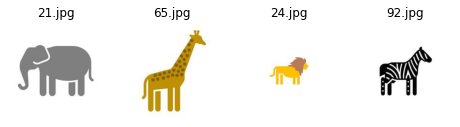

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

data = "/content/drive/MyDrive/safari/training"
classes = os.listdir(data)
classes.sort()

print(len(classes), "classes")
print(classes)

#plot the data

fig = plt.figure(figsize = (8,10))
i = 0

for sub_dir in os.listdir(data):
    i+=1
    img_file = os.listdir(os.path.join(data,sub_dir))[0]
    img_path = os.path.join(data, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a = fig.add_subplot(1,len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
plt.show()

# Prepare data

different method for preprocessing data for image and for csv(text and number data)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128,128)  #standard you can chnage it
batch_size = 30 #standard you can change it

print("Getting data ready ..")

datagen = ImageDataGenerator(rescale = 1/255,    #normalize pixel value
                             validation_split = 0.30)


print('Training data prepare')
train_generation = datagen.flow_from_directory(
    data,
    batch_size = batch_size,
    target_size = img_size,
    class_mode = 'categorical',
    subset = 'training'
)

print("validation data")
val_generate = datagen.flow_from_directory(
    data,
    batch_size = batch_size,
    target_size = img_size,
    class_mode = 'categorical',
    subset = 'validation'

)

class_name = list(train_generation.class_indices.keys())
print('data generation ready')


Getting data ready ..
Training data prepare
Found 280 images belonging to 4 classes.
validation data
Found 116 images belonging to 4 classes.
data generation ready


Build CNN model

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten

model = Sequential()

#first CNN model 
model.add(Conv2D(32,(6,6), input_shape = train_generation.image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

#2nd CNN model

model.add(Conv2D(32,(6,6), activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(train_generation.num_classes, activation = 'softmax'))

model.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics =['accuracy'])

print(model.summary())




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 123, 123, 32)      3488      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 61, 61, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        36896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 flatten (Flatten)           (None, 25088)             0

# **Train Model**

In [6]:
num_epoch = 10
history = model.fit(
    train_generation,
    steps_per_epoch = train_generation.samples // batch_size,
    validation_data = val_generate,
    validation_steps = val_generate.samples // batch_size,
    epochs = num_epoch
)

Epoch 1/10
9/9 [==============================] - 82s 9s/step - loss: 1.4853 - accuracy: 0.4720 - val_loss: 0.8518 - val_accuracy: 0.9333
Epoch 2/10
9/9 [==============================] - 11s 1s/step - loss: 0.4989 - accuracy: 0.9000 - val_loss: 0.1532 - val_accuracy: 1.0000
Epoch 3/10
9/9 [==============================] - 12s 1s/step - loss: 0.1037 - accuracy: 0.9889 - val_loss: 0.0248 - val_accuracy: 1.0000
Epoch 4/10
9/9 [==============================] - 11s 1s/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 5/10
9/9 [==============================] - 12s 1s/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 7.3109e-04 - val_accuracy: 1.0000
Epoch 6/10
9/9 [==============================] - 11s 1s/step - loss: 6.8730e-04 - accuracy: 1.0000 - val_loss: 5.9595e-04 - val_accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 11s 1s/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 3.9919e-04 - val_accuracy: 1.0000
Epoch 8/10
9/9 [==

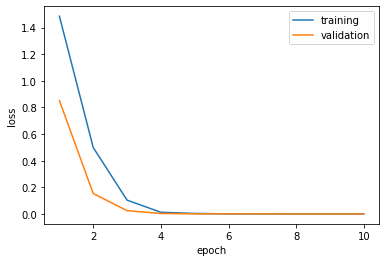

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epoch+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()